# CV19MUILTISIM: 
Parameter exploration module for cv19gm. 
With this module you can easily perform sensitivity analysis over multiple parameters by giving them as lists.


In [1]:
from cv19gm.cv19multisim import CV19MULTISIM

In [2]:
import numpy as np
import toml
import time
import matplotlib.pyplot as plt

In [6]:
cfg = 'cfg/SEIR.toml'

## Multisimulation object creation
Every parameter that's given as a list will be recognized as a parameter to iterate over multiple simulations

In [137]:
# This will create 5 simulations with different beta values
sims = CV19MULTISIM(cfg,beta=[0.1,0.15,0.2,0.25,0.3],t_end=300)

In [138]:
# Resolver EDOS
sims.solve()

## Results are accessed through an array of simulations with n dimensions, where n is the amount of parameters that are iterated over

In [139]:
np.shape(sims.sims)

(5,)

In [140]:
sims.sims[0].results

,t,dates,S,E,E_d,I,I_d,R,R_d,Flux,...,I_d_det,I_ac_det,beta,alpha,tE_I,tI_R,rR_S,prevalence_total,prevalence_susc,prevalence_det
0,0,None,986000,3000,1500,6000,3000,5000,0,0,...,3000,15000,0.1,1.0,5.0,10.0,0.0,0.015000,0.015000,0.015000
1,1,None,985408,2992,925,5999,1482,5599,379,0,...,1482,18000,0.1,1.0,5.0,10.0,0.0,0.018000,0.018000,0.018000
2,2,None,984817,2985,714,5997,923,6199,518,0,...,923,19482,0.1,1.0,5.0,10.0,0.0,0.019482,0.019482,0.019482
3,3,None,984227,2979,635,5994,716,6799,569,0,...,716,20405,0.1,1.0,5.0,10.0,0.0,0.020405,0.020405,0.020405
4,4,None,983637,2973,606,5990,639,7398,588,0,...,639,21121,0.1,1.0,5.0,10.0,0.0,0.021122,0.021122,0.021122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,None,884791,600,116,1304,121,113303,131,0,...,121,123153,0.1,1.0,5.0,10.0,0.0,0.123153,0.123153,0.123153
296,296,None,884676,596,115,1293,120,113433,130,0,...,120,123274,0.1,1.0,5.0,10.0,0.0,0.123275,0.123275,0.123275
297,297,None,884562,591,114,1283,119,113562,129,0,...,119,123394,0.1,1.0,5.0,10.0,0.0,0.123395,0.123395,0.123395
298,298,None,884449,586,113,1273,118,113689,128,0,...,118,123513,0.1,1.0,5.0,10.0,0.0,0.123514,0.123514,0.123514


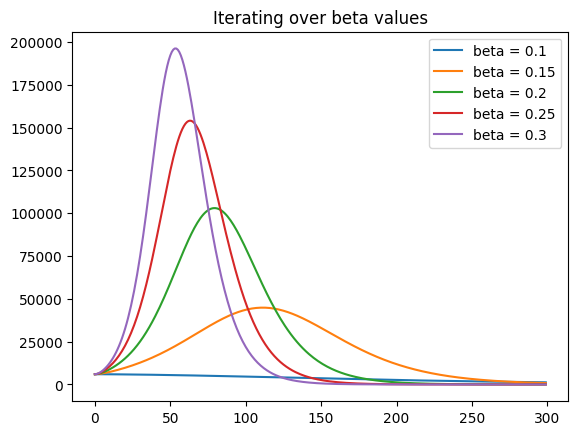

In [141]:
for sim in sims.sims:
    plt.plot(sim.results['t'],sim.results['I'],label='beta = '+str(sim.beta(0)))
plt.legend(loc=0)
plt.title('Iterating over beta values')
plt.show()

# Studying the influence of multiple parameters

In [142]:
tI_R = list(np.linspace(1,20,39))
tE_I = list(np.linspace(1,20,39)) 

In [143]:
sims2 = CV19MULTISIM(cfg,tE_I = tE_I, tI_R = tI_R,t_end=500)

In [144]:
# This may take a while becase we are solving 39x39 = 1521 simulations
sims2.solve()

### Here we will study the influence of incubation and infectious time on the peak size and day

In [145]:
peak = np.zeros(np.shape(sims2.sims))
peak_day = np.zeros(np.shape(sims2.sims))
for i,j in np.ndindex(np.shape(sims2.sims)):
    peak[i,j] = sims2.sims[i,j].peak
    peak_day[i,j] = sims2.sims[i,j].peak_t

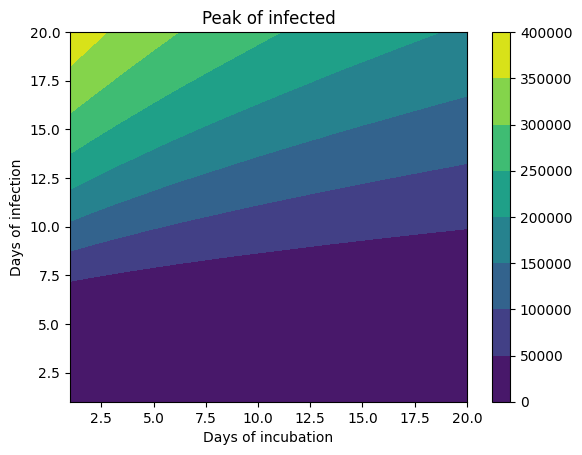

In [146]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(tI_R,tI_R,peak)
fig.colorbar(cp) # increase fontsize
ax.set_xlabel('Days of incubation')
ax.set_ylabel('Days of infection')
ax.title.set_text('Peak of infected')
plt.show()

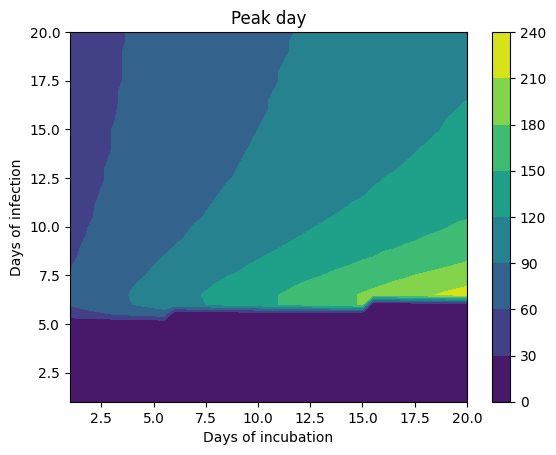

In [147]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(tI_R,tI_R,peak_day)
fig.colorbar(cp) # increase fontsize
ax.set_xlabel('Days of incubation')
ax.set_ylabel('Days of infection')
ax.title.set_text('Peak day')
plt.show()

# SEIRHVD
Studying the effects of hospital capacity for different alphas (interaction rate)

## Multiple simulations with array of parameters

In [174]:
# Interaction rate
alpha = list(np.linspace(0.1,1,10))
# Hospital capacity
H_cap = list(np.linspace(1000,4000,31))

In [175]:
cfgfile = 'cfg/SEIRHVD.toml'
sims5 = CV19MULTISIM(cfgfile,alpha = alpha, H_cap = H_cap)

In [176]:
sims5.solve()

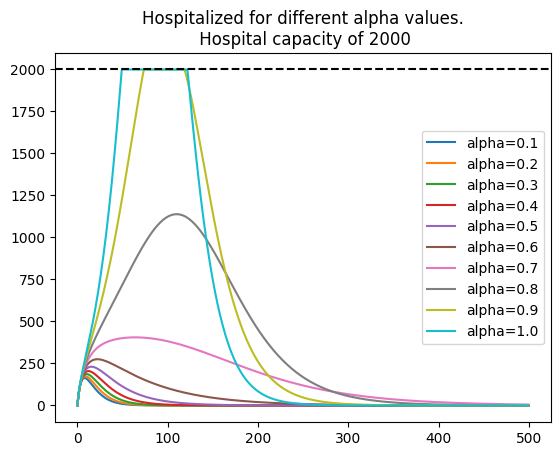

In [183]:
i = 10
for sim in sims5.sims[i,:]:
    plt.plot(sim.t,sim.H,label='alpha='+str(np.around(sim.alpha(0),1)))
plt.axhline(sims5.sims[i,0].H_cap,linestyle='--',color='k')
plt.legend(loc=0)
plt.title('Hospitalized for different alpha values.\n Hospital capacity of '+str(int(sims5.sims[i,0].H_cap)))
plt.show()

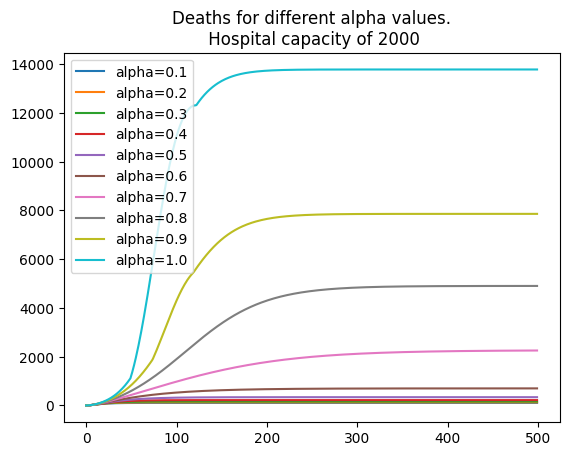

In [185]:
i = 10
for sim in sims5.sims[i,:]:
    plt.plot(sim.t,sim.D,label='alpha='+str(np.around(sim.alpha(0),1)))
#plt.axhline(sims5.sims[i,0].H_cap,linestyle='--',color='k')
plt.legend(loc=0)
plt.title('Deaths for different alpha values.\n Hospital capacity of '+str(int(sims5.sims[i,0].H_cap)))
plt.show()